# Lead Scoring Case Study:
A logistic Regression Problem Statement

In [1514]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1515]:
import pandas as pd                                                   # Importing Querying Language
import numpy as np                                                    # Importing Numerical Python for calculations
                                                                      # For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

                                                                      # To Scale our data
from sklearn.preprocessing import scale

from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import xticks
%matplotlib inline

## Steps to solve the Problem Statement:
1. Loading Data
2. Inspecting Data Frame 
3. Data Pre-Processing
4. Data Preparation (Encoding, Scaling)
4. Exploratory Data Analysis using Data Visualizations 
4. Binary Classification Modeling `(Logistic Regression)`
5. Conversion Prediction
6. Evaluation Metrics


### 1: `Loading data` 

In [1516]:
# 1.1 Loading Data 
df_leads = pd.read_csv('Leads.csv')
# Making a copy of data (It is advisable to make a copy of original data before any modifications)
df_leads_copy = df_leads.copy()

### 2: `Inspection` of dataframe 
#### *`Lap-1:`*

  1. View the dataframe.  
  2. Check the dimensions of the dataframe.
  3. Understand the data types, no of non-null data to get an initial look at data attributes.
  4. Column listing to understand the metadata information of the data.
  5. Descriptive statistics to understand the primary spread of the data.
  
__*`Note`:*__ *We repeat the process of data inspection until data pre-processing is completely done.*

In [1517]:
# 2.1 Visualizing data frame
df_leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [1518]:
# 2.2 Shape of dataframe
df_leads.shape

(9240, 37)

In [1519]:
# 2.3 Columns in the dataframe
df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

__`Remarks:`__ `Prospect ID` and `Lead Number` are Id's given to the leads. If there are no `duplicates`, let us make one of them as `custom index` to the data. 

In [1520]:
# 2.4 Details about columns of dataframe
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [1521]:
# 2.5 Descriptive Statistics
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


__Remarks:__
1. `Lead Number` is a kind of id. So, descriptive statistics hold no meaning
2. Only 6 features are numerical in nature.
3. Let us understand statistics of the data column-wise
    - __`Converted:`__ This is our `binary classification label` (used as output/feature). there are only 2 categorical values for it, __`(0,1)`__. So, the __mean indicates the conversion percent which is at `38.5%`__.
    - __`Total Visits`__ It is a feature and it is `distributed symmetrically around median`. Here, `outliers (max values) effect the standard deviation.` We have to be __careful before modelling__.
    - __`Total Time Spent on Website:`__ This data looks highly assymetrical.
    - __`Page Views Per Visit:`__ Distribution of data is symmetrical around `25-75 percentiles` but looks like outliers has an influence. We have to be __careful before modelling__
    - __`Asymmetrique Activity Score` and `Asymmetrique Profile Score`__ are categorical in nature but they might get dropped due to large volumes of data missing `(Refer the count)` 
    
__*`Note:`*__ *From `converted`, we know `58.5%` leads are converted. So, we can say, there will not be any problem in catching the right model. In other words, `no boot strapping or other anamoly detection techniques required.`* 

#### 2.1: Setting the index:
Before data pre-processing, let us set an appropriate `custom index` to the data. 
- Check the uniqie values in both `Lead Number` as well as `Prospect ID`.
- Make any one a custom index and drop the other 

In [1522]:
print('No of unique values in Prospect ID:', df_leads['Prospect ID'].nunique())
print('No of unique values in Lead Number:', df_leads['Lead Number'].nunique())

No of unique values in Prospect ID: 9240
No of unique values in Lead Number: 9240


__Remarks:__ Both have all values unique. I would like to __set `Lead Number` as index__ and __drop `Prospect ID`__ column since lead number is easy to interpret.

In [1523]:
df_leads.set_index('Lead Number', inplace = True)
df_leads.head(2)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


__Remarks:__ We will drop `Prospect ID` while pre-processing

### 3: Data Pre-Processing: Generic Work-Flow 
Data Pre-Processing is performed in steps. While pre-processing, we shall follow the below thumb rules:
1. `Percentage missing values in columns:`
    - If `missing values > 40%`, drop columns directly
    - If `< 40%`, Inpute if feasible otherwise drop
      
2. `Percentage missing values in rows:`
    - Delete rows with all null values
    - Delete all rows with `> 5` null values
    
3. `Re-inspect` the data 

4. Repeat the process until we have `all clean (no null value) data`

__*Note:*__ *`Logistic regression` is a numerical technique and it cannot deal with `NaN/Null` Values*

#### 3.1: `Handling Select` - Case-Study specific Pre-Processing
Lead generation data largely come from the forms people fill from different social networks on the advertizements.
- These forms are largely generic google docs with questions that allow the firm to categorize them.
- Typical questions include `level of education` or `course you are interested in` and so on.
- People are expected to `select from options provided`
- You can check an example in the below cell. `Specialization has a column select`.
- If people are `not interested in disclosing information or the option is non existent`. They will leave the optional columns without filling.

__`Conclusion:`__ We can say, select is nothing but an empty cell which means `NaN.Null`. Let us replace all __`select with NaN`__ and Pre-Process data as mentioned previously.


In [1524]:
df_leads['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [1525]:
# Replacing Select with NaN/Null
df_leads = df_leads.replace('Select', np.nan)

#### 3.2: `Handling Nan/Null Values` 

In [1526]:
#1. Finding out the number of empty columns.

# Step 1: Null count in each column
null_count_each_column = df_leads.isnull().sum(axis = 0)
# Step 2: Counting the number of empty columns 
Number_of_empty_columns = null_count_each_column[null_count_each_column == df_leads.shape[0]].count()

print("Total number of empty columns:")
print(Number_of_empty_columns)

Total number of empty columns:
0


In [1527]:
#2. Finding out the row-wise null count
row_wise_null_count = df_leads.isnull().sum(axis = 1) # Row wise null count before any kind of data cleaning

# Let us see how null values are distributed across rows 
print("Total number of rows with unique number of null values: \n")
# Example: Rows with 0 null values
#          Rows with 1 null values
#          and so on
null_valuecounts_sorted = row_wise_null_count.value_counts().sort_index(ascending = False)
print(null_valuecounts_sorted,'\n')

Total number of rows with unique number of null values: 

15       1
14       2
13     412
12     257
11     171
10     580
9      876
8      618
7      656
6     1406
5     1266
4      534
3      466
2      838
1      859
0      298
dtype: int64 



__Remarks:__ 
1. There are `zero rows and columns with all null values`. 
2. It seems there are `more rows with >= 5` null values. `(Let us compute the cumulative sum and find out)`.

In [1528]:
# Find the total number of missing rows with " >=5 " missing values
row_wise_null_count_cumsum = null_valuecounts_sorted.cumsum()
row_wise_null_count_cumsum

15       1
14       3
13     415
12     672
11     843
10    1423
9     2299
8     2917
7     3573
6     4979
5     6245
4     6779
3     7245
2     8083
1     8942
0     9240
dtype: int64

In [1529]:
print('Percent rows with >= 5 null values',round((100*row_wise_null_count_cumsum[5]/df_leads.shape[0]),2))

Percent rows with >= 5 null values 67.59


__Remarks:__ `67.59%` rows have more than `5 missing values`. We simply cannot aford to loose that amount of data. 
1. Thus, we will do all the `pre-processing column-wise first` 
2. later, re-inspect the row-wise null count and decide how to `impute/drop` the remaining rows. 

In [1530]:
#3. Finding the null value percent in each column
null_percent_column_wise = round(100*(df_leads.isnull().sum(axis=0)/len(df_leads.index)),1)
null_percent_column_wise = null_percent_column_wise.sort_values(ascending = False)


In [1531]:
print(null_percent_column_wise)

How did you hear about X Education               78.5
Lead Profile                                     74.2
Lead Quality                                     51.6
Asymmetrique Profile Score                       45.6
Asymmetrique Activity Score                      45.6
Asymmetrique Profile Index                       45.6
Asymmetrique Activity Index                      45.6
City                                             39.7
Specialization                                   36.6
Tags                                             36.3
What matters most to you in choosing a course    29.3
What is your current occupation                  29.1
Country                                          26.6
TotalVisits                                       1.5
Page Views Per Visit                              1.5
Last Activity                                     1.1
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                 

__Remarks:__ There are approximately `7 columns with > 40% mising data`. So we will drop all such columns.

#### 3.3: Dropping Columns `(Round 1)`
1. We will drop all the columns with `null percent > 40`.
2. We will also `drop Prospect ID` since we already considered `Lead Number as an index`


In [1532]:
# Making a list of columns with more than 40% null values
drop_column_list = list(null_percent_column_wise[null_percent_column_wise>40].index)
# Adding `Prospect ID` to the list of columns to be dropped out 
drop_column_list.append('Prospect ID')
# Dropping columns
df_leads.drop(drop_column_list, axis = 1, inplace = True)

In [1533]:
df_leads.head(1)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified


#### 3.4: `Impute or Drop` Analysis
There are 6 columns with `20 - 40%` missing values. Let us see what columns to impute and what to drop.
1. The columns include:
    - City
    - Specialization
    - Tags
    - What matters most to you in choosing a course
    - What is your current occupation
    - Country


2. Let us make some visualizations to answer the following dilemma
    - Whether to impute or drop?
    - If we decide to impute, with what value

##### `City:` Percentage values in each category 

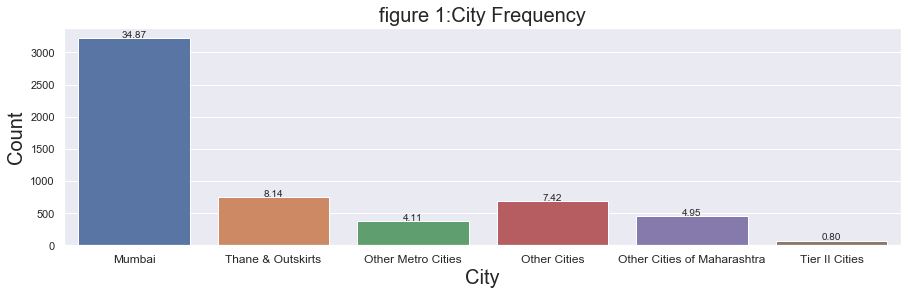

In [1534]:
plt.figure(figsize=(15, 4)) # Figure Size
# Column = City

ax = sns.countplot(x="City", data=df_leads) # Plot definition
plt.title("figure 1:City Frequency", fontsize = 20)                              # Plot title
plt.xlabel('City', fontsize=20)
plt.ylabel('Count', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0,fontsize=12)
# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_leads))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 7,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 
plt.show()

__Remarks:__
1. `39.7% data` is missing in city.
2. `43%` of the remaining values are in and around mumbai.
2. The courses offered are online courses and would typically expect `no bearing of city on lead conversions`.

So, let us `drop city`. 

##### `Country:` Percentage values in each category

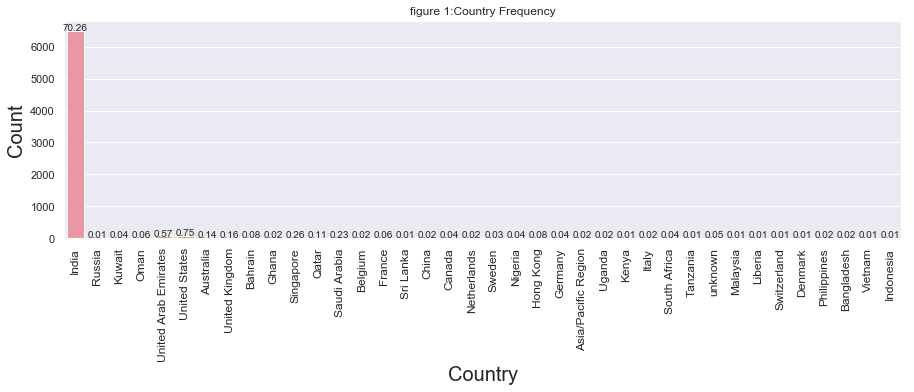

In [1535]:
# Column = Country
plt.figure(figsize=(15, 4))
ax = sns.countplot(x="Country", data=df_leads) # Plot definition
plt.title("figure 1:Country Frequency")                              # Plot title
plt.xlabel('Country', fontsize=20)
plt.ylabel('Count', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=12)
# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_leads))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 
    

__Remarks:__ 
1. Approx `26%` data is missing from country.
2. And `70%` prospective leads are from india.
3. This leaves us with `4%` prospects from other countries.
4. We can say, it is `good to impute data with country = india` 
5. But this makes `> 96%` values to be india.
6. It is almost like having a `constant value` through out.

So, We choose to `drop country`

##### `Specialization:` Percentage values in  each category

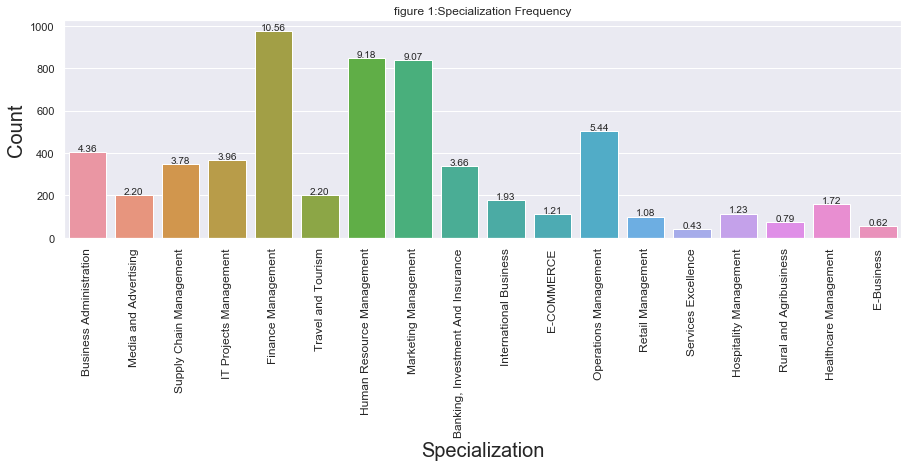

In [1536]:
# Column = Specialization
plt.figure(figsize=(15, 4))
ax = sns.countplot(x="Specialization", data=df_leads) # Plot definition
plt.title("figure 1:Specialization Frequency")                              # Plot title
plt.xlabel('Specialization', fontsize=20)
plt.ylabel('Count', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=12)
# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_leads))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 
    

__Remarks:__
1. `Specialization` might be one of the important feature but let us look at the numbers to decide.
1. Approx `37%` of values are missing from specialization.
2. But we can see from countplot that `no single value is predominant`.
3. So it is a bad idea to impute data with any one value.
4. We expect some of the poeple might not have their `specialization` in the drop down provided.


We chose to `impute Specialization` with __`Others`__. 

##### `Tags:` Percentage value in each category

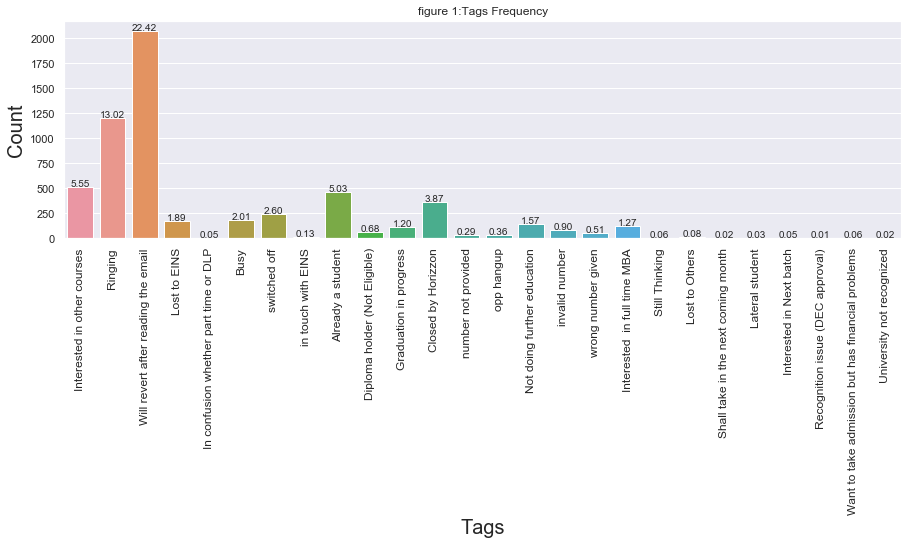

In [1537]:
# Column = Tags
plt.figure(figsize=(15, 4))
ax = sns.countplot(x="Tags", data=df_leads) # Plot definition
plt.title("figure 1:Tags Frequency")                              # Plot title
plt.xlabel('Tags', fontsize=20)
plt.ylabel('Count', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=12)
# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_leads))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 
    

__Remarks:__
1. Approx `37%` data is missing from tags also. 
2. But leads convert from `Prospective` to `converted` only after constant follow-up
3. `Tags` are instrumental in understanding how the follow-ups went each time.
4. We feel this column should be instrumental. in modelling.

We chose to `impute Tags`

##### `What matters most to you in choosing a course:` Percent values in each category

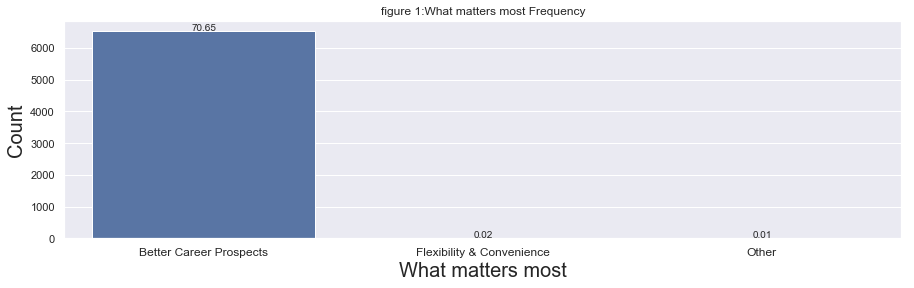

In [1538]:
# Column = What matters most to you in choosing a course
plt.figure(figsize=(15, 4))
ax = sns.countplot(x="What matters most to you in choosing a course", data=df_leads) # Plot definition
plt.title("figure 1:What matters most Frequency")                              # Plot title
plt.xlabel('What matters most', fontsize=20)
plt.ylabel('Count', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0,fontsize=12)
# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_leads))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 

__Remarks:__ 
1. Approx `29%` data is missing from `what matters most`.
2. And `70%` prospective leads are stating `better career prospects`.
3. This leave us with `1%` prospects from other categories.
4. We can say, it is `good to impute data with better career prospects` 
5. But this makes `> 99%` values to be india.
6. It is almost like having a `constant value` through out.

So, We choose to `drop What matters most to you in choosing a course`

##### `What is your current occupation:` Percentage values in each category

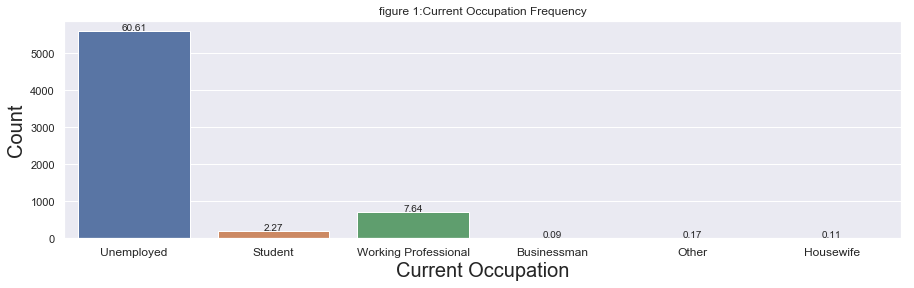

In [1539]:
# Column = What is your current occupation
plt.figure(figsize=(15, 4))
ax = sns.countplot(x="What is your current occupation", data=df_leads) # Plot definition
plt.title("figure 1:Current Occupation Frequency")                              # Plot title
plt.xlabel('Current Occupation', fontsize=20)
plt.ylabel('Count', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0,fontsize=12)
# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_leads))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 5,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 

__Remarks:__
1. Approx `29%` data is missing.
2. Unemployed accounts to approx `60%` of people and no other category is that prominent.

We chose to `impute occupation with Unemployed.`

In short, we chose to
1. Drop `City`,`Country` and `What matters most to you in chosing the course`
2. Impute `Specialization`, `Tags` and `What is your cirrent occupation` 

In [1540]:
# Dropping columns
drop_list = ['Country','What matters most to you in choosing a course','City']
df_leads.drop(drop_list, axis = 1, inplace = True)

In [1541]:
# Impute Columns:
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Others')
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan,'Unemployed')

#### `Imputing` using probabilities (`Tags`)
1. We know that, if there is a large number of data. The probability of a particular outcome is given by `no of times that particular outcome came/ total number of outcomes.`
2. In this case, we have sufficient number of data points.
3. For time being, to impute data as randomly as possible. We assume that, `outcome of each column is independent of other columns.`
4. After making that assumption, `percentage count / Frequency` will be the probability of that respective `category` as an outcome.
5. So, let us distribute the `NaN data` using the same `multinomial probabilities`.
6. This helps us to have the existing data, `same percentage of each category even after imputation`.

Let us do it on the tags column because `tags` column might be an important feature. If so, making a default computation makes the feature (tag) biased towards the imputed category.

In [1542]:
# Step 1: Compute the total number of null values in "Tag"
total_null_values_in_tags = df_leads['Tags'].isnull().sum()
total_null_values_in_tags

3353

In [1543]:
# Step 2: Probabilities of each category
Probabilities_tags = df_leads['Tags'].value_counts()/(df_leads.shape[0] - total_null_values_in_tags)
list_probabilities = list(np.around(Probabilities_tags.values, decimals = 2))
# list_probabilities

In [1544]:
# Step 3: List of how many values to be replaced by which category
null_frequency = list(np.random.multinomial(total_null_values_in_tags, list_probabilities))
#null_frequency

In [1545]:
#Step 4: Generating Categorical Data of Tags using the distribution above
list_categories = list(Probabilities_tags.index)
list_tags = []

for i in range(0,len(list_categories)):
     
    for j in range(0,null_frequency[i]):
        list_tags.append(list_categories[i])

In [1546]:
#Step5: Make a series out of "list_tags" so that we can randomize the values
series_tags = pd.Series(list_tags)
series_tags = series_tags.sample(frac=1).reset_index(drop=True)
#series_tags.values

# Step 6: nan list
index1 = list(df_leads[df_leads['Tags'].isnull()].index)

# Imputing Tag values wit the generated series
df_leads['Tags'].loc[index1] = list(series_tags.values)
#df_leads.head(20)

In [1547]:
# Step 6: nan list
index1 = list(df_leads[df_leads['Tags'].isnull()].index)


In [1548]:
# Imputing Tag values wit the generated series
df_leads['Tags'].loc[index1] = list(series_tags.values)
#df_leads.head(20)

In [1549]:
df_leads['Tags'].head(5)

Lead Number
660737            Interested in other courses
660728                                Ringing
660727    Will revert after reading the email
660719                                Ringing
660681    Will revert after reading the email
Name: Tags, dtype: object

In [1550]:
# Step 8: Cross Checking whether the "Tags" column has same percentage of each category values
# Verification 1: Same Probabilities
total_null_values_in_tags1 = df_leads['Tags'].isnull().sum()
Probabilities_tags_verify = df_leads['Tags'].value_counts()/(df_leads.shape[0] - total_null_values_in_tags1)

# Compare the probabilities
df_tags_compare = pd.concat([Probabilities_tags_verify, Probabilities_tags],
                               axis = 1)
print('Percentage of each category data pre and post imputation')
df_tags_compare.columns = ['Imputed','Original']
df_tags_compare.head(3)

Percentage of each category data pre and post imputation


,Imputed,Original
Already a student,0.075758,0.078988
Busy,0.032251,0.031595
Closed by Horizzon,0.061147,0.060812


In [1551]:
# Check whether there are any null values in "Tags"
total_null_values_in_tags1

0

__Remarks:__ We successfully `imputed tags data with all categories without biasing any one or few categories over others`. The probabilities in the above table suggests that, the distributions of categories are kept intact.

#### 3.5: Re-inspecting dataframe for `null values` - `(Lap - 2)`

In [1552]:
#3. Finding the null value percent in each column
null_percent_column_wise_1 = round(100*(df_leads.isnull().sum(axis=0)/len(df_leads.index)),1)
null_percent_column_wise_1 = null_percent_column_wise_1.sort_values(ascending = False)

null_percent_column_wise_1

TotalVisits                                 1.5
Page Views Per Visit                        1.5
Last Activity                               1.1
Lead Source                                 0.4
Last Notable Activity                       0.0
Search                                      0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
Total Time Spent on Website                 0.0
Specialization                              0.0
What is your current occupation             0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

#### 3.6: Drop the rest of the  null values and re-inspect  `(Lap - 4)`

In [1553]:
df_leads = df_leads.dropna()

In [1554]:
# Check the database for NAs again
round(100*(df_leads.isnull().sum(axis=0)/len(df_leads.index)),1)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

#### 3.7: Check for columns with `single categorical variable` , `drop` and `inspect`

In [1555]:
# Categorical Variables with one unique value
drop_list_new = []
for i in df_leads.columns:
    if len(df_leads[i].unique()) == 1:
        drop_list_new.append(i)
        print(i, ':', df_leads[i].unique())

        

Magazine : ['No']
Receive More Updates About Our Courses : ['No']
Update me on Supply Chain Content : ['No']
Get updates on DM Content : ['No']
I agree to pay the amount through cheque : ['No']


In [1556]:
# Dropping those columns
df_leads.drop(drop_list_new, axis = 1, inplace = True)

#### Re-inspecting dataframe `(Final Lap)`

In [1557]:
# View Data
df_leads.head(1)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,Interested in other courses,No,Modified


In [1558]:
# Length of Columns
len(df_leads.columns)

20

In [1559]:
# Info
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 660737 to 579533
Data columns (total 20 columns):
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null object
Do Not Call                               9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Specialization                            9074 non-null object
What is your current occupation           9074 non-null object
Search                                    9074 non-null object
Newspaper Article                         9074 non-null object
X Education Forums                        9074 non-null object
News

In [1560]:
# Descriptive Statistics
df_leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


__Final Remarks:__ 
1. Only `Total Time Spent on Website` is a __continuous variable__. Rest all are `categorical` in nature.
2. We are left with `20 columns and 9074 rows` to work with.

### 4: Exploratory Data Analysis using `Data Visualization`
We perform data visualization to understand the data. The stages included in data visualization are:
1. Understanding the `data distributions`:     
2. Segmented Univariate Analysis `w.r.t Converted:` 
    
3. `Bi-variate Analysis:` Include `Scatter Plots` that we perform before the modeling to understand `multi-collinearity`. But we expect less insights as there is only one continuous variable and multi-collinearity do not explain much of categorical variables.

#### 4.1: Understanding Conversions - `Converted Column (Label)`

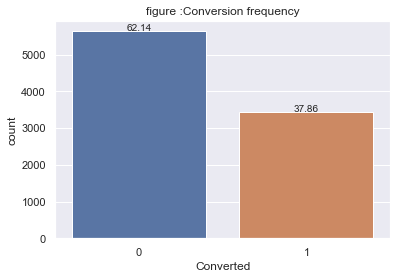

In [1561]:
plt.figure(figsize=(6, 4))                               # Figure Size

ax = sns.countplot(x="Converted", data=df_leads) # Plot definition
plt.title("figure :Conversion frequency")                              # Plot title

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(df_leads))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    
            height + 3,
            '{:1.2f}'.format((height/total)*100),          
            ha="center") 

__Remarks:__ The distribution of `binary classification of label(converted)` is substantial in the data. We don't have to worry about preparing the data for anamoly detection

#### 4.2: Understanding Data Distributions
Data distributions are an intuitive way of undestanding: (They cater to only quantitative/continuous variables)
- Outliers (Min and Max values and how far they are)
- Spread of data (Symmetric or Assymetric)
- Data range and so on

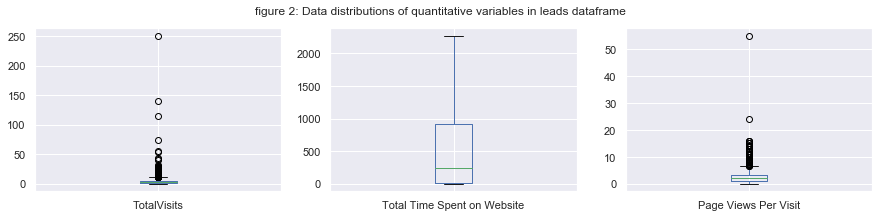

In [1562]:
# Ploting 'Box ans Whisker Plot' to understand the data distribution of the quantitative variables

# Further taking important quantitative variables into another dataframe 'loan_chargedoff_quant'
df_leads_cont = df_leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Plotting the distribution  of the variables
df_leads_cont.plot(kind='box',subplots=True,layout=(1,3), sharex=False,figsize = (15,3), 
                           title='figure 2: Data distributions of quantitative variables in leads dataframe') 
plt.show()

__Remarks:__ We know that:
1. `Total Time Spent on Website` is the only continuous variable. The data is assymetrically distributed towards the right i.e.. `50-75th percentile range.` This suggests that more people are spending substantial time on website (which is good)
2. `TotalVisits / Page Views Per Visit` are categorical in nature and has outliers on `> 75 percentile side`.

These outliers cannot be removed because a person visiting pages repeatedly is supposed to be interested in the offering and is a prospective lead. `Removing these outliers` might effect the modelling.

#### 4.3: Segmented Univariate analysis `w.r.t Converted`
This in making estimated choices in dropping features while modelling.`RFE and VIF metrics` are determinental in choosing dropped columns but this analysis helps in assisting with which comes first.
1. We choose to plot `Count-Plots (if discrete) and Bar-Plots (if continuous)`.
2. Approximately 18 columns are studied
3. We will draw `1-4 graphs` at a time and look at the analysis (Remarks)

In [1563]:
# Number of values in each categorical variable
for i in df_leads.columns:
    if len(df_leads[i].unique()) == 2:
         print(i, ':', len(df_leads[i].unique()))

Do Not Email : 2
Do Not Call : 2
Converted : 2
Search : 2
Newspaper Article : 2
X Education Forums : 2
Newspaper : 2
Digital Advertisement : 2
Through Recommendations : 2
A free copy of Mastering The Interview : 2


__Remarks:__ Basing on the number of values in each categorical variables. We decide not to plot (Graphs will be clumsy)
- `TotalVisits`, `Total Time Spent on Website`, `Page Views Per Visit`

##### Plotting all columns `with 2 categories`

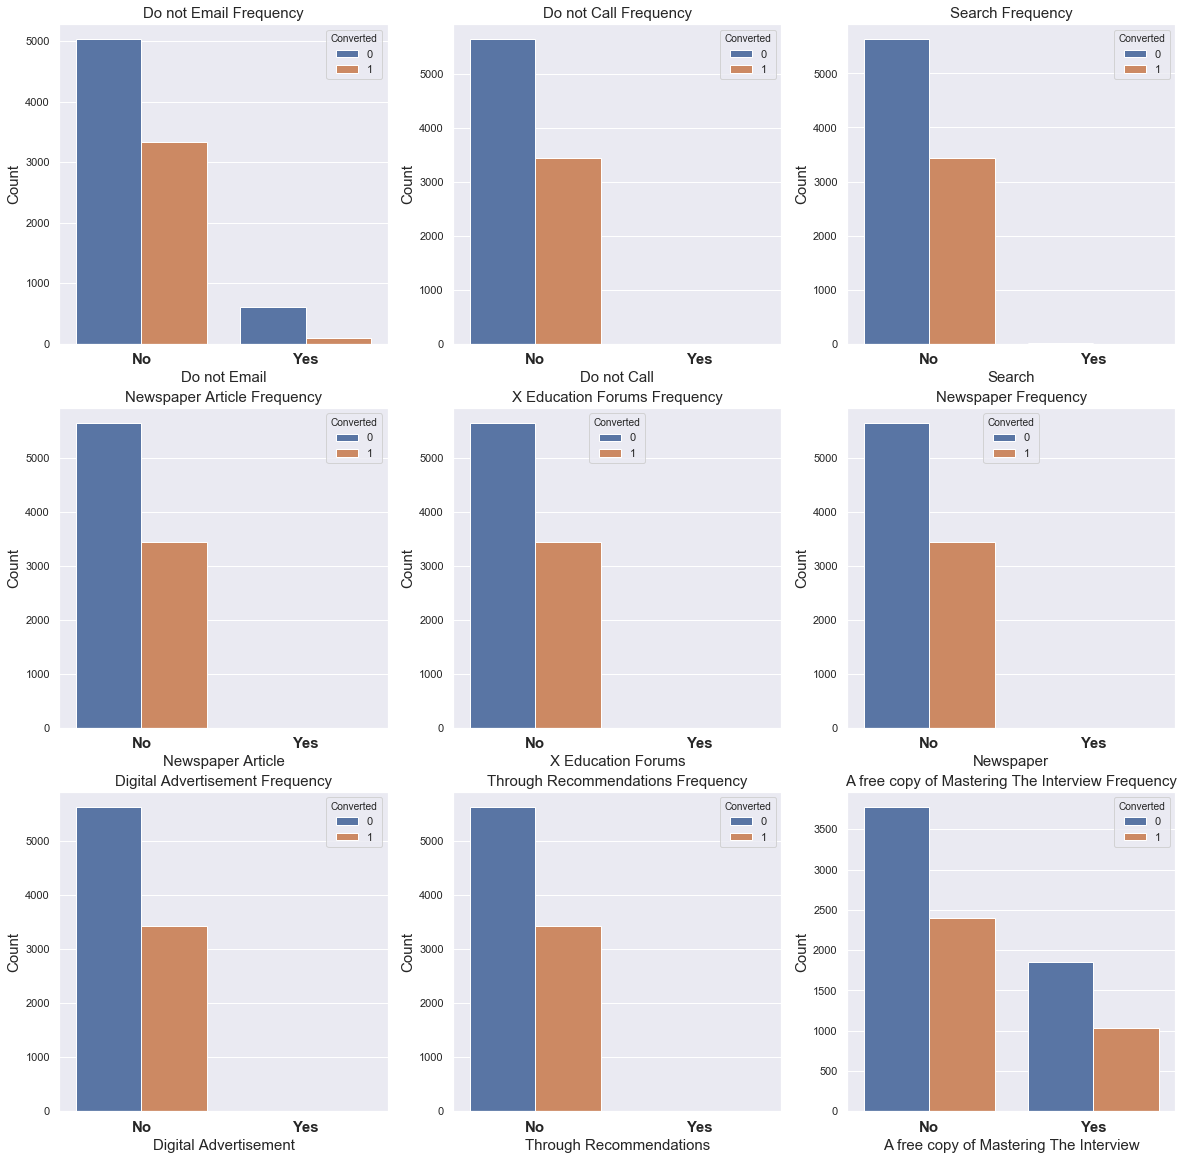

In [1564]:
## 1. 
plt.figure(figsize=(20,20))  # Figure Size
# Column = Do not Email
plt.subplot(3, 3, 1)
sns.set(style="darkgrid")
ax=sns.countplot(x = 'Do Not Email',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('Do not Email Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Do not Email', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)

# Column = Do not Call
plt.subplot(3, 3, 2)
sns.set(style="darkgrid")
ax=sns.countplot(x = 'Do Not Call',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('Do not Call Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Do not Call', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)

# Column = Search
plt.subplot(3, 3, 3)
sns.set(style="darkgrid")
ax=sns.countplot(x = 'Search',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('Search Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Search', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)

# Column = Newspaper Article
plt.subplot(3, 3, 4)
sns.set(style="darkgrid")
ax=sns.countplot(x = 'Newspaper Article',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('Newspaper Article Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Newspaper Article', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)

# Column = X Education Forums
plt.subplot(3, 3, 5)
sns.set(style="darkgrid")
ax=sns.countplot(x = 'X Education Forums',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('X Education Forums Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('X Education Forums', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)

# Column = Newspaper
plt.subplot(3, 3, 6)
sns.set(style="darkgrid")
ax=sns.countplot(x = 'Newspaper',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('Newspaper Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Newspaper', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)

# Column = Digital Advertisement
plt.subplot(3, 3, 7)
sns.set(style="darkgrid")
ax=sns.countplot(x = 'Digital Advertisement',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('Digital Advertisement Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Digital Advertisement', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)

# Column = Through Recommendations
plt.subplot(3, 3, 8)
sns.set(style="darkgrid")
ax=sns.countplot(x = 'Through Recommendations',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('Through Recommendations Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Through Recommendations', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)

# Column = A free copy of Mastering The Interview
plt.subplot(3, 3, 9)
sns.set(style="darkgrid")
ax=sns.countplot(x = 'A free copy of Mastering The Interview',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('A free copy of Mastering The Interview Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('A free copy of Mastering The Interview', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),weight="bold",fontsize=15)

plt.show()

__Remarks:__ Almost all the features above relate to:
1. How user got to know about the site?
2. Why and what user want in the site?
3. Whether user want to have further communication?

While they want to be communicated, the `marketing campaign that worked was "A free copy of Mastering the interview".` We would expect this to be an importamt feature to get the leads (not conversions). 

##### Plotting all columns with `[4,6]`Categories

In [1565]:
# Number of values in each categorical variable
for i in df_leads.columns:
    if len(df_leads[i].unique()) in [4,6]:
         print(i, ':', len(df_leads[i].unique()))

Lead Origin : 4
What is your current occupation : 6


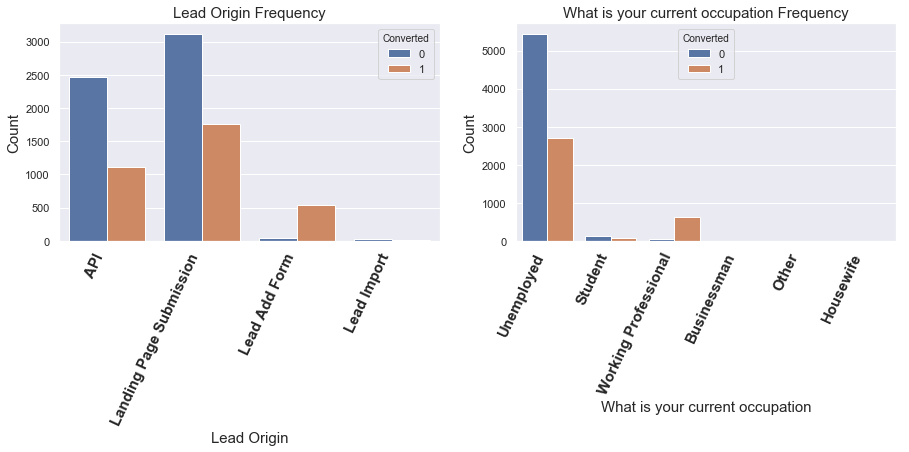

In [1566]:
##### 2. 
plt.figure(figsize=(15,4))  # Figure Size
# Column = Lead Origin
plt.subplot(1, 2 , 1)
sns.set(style="darkgrid")
ax=sns.countplot(x = 'Lead Origin',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('Lead Origin Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Lead Origin', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 65,ha = 'right',weight="bold",fontsize=15)

# Column = What is your current occupation
plt.subplot(1, 2, 2)
sns.set(style="darkgrid")
ax=sns.countplot(x = 'What is your current occupation',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('What is your current occupation Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('What is your current occupation', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 65,ha = 'right',weight="bold",fontsize=15)

plt.show()

__Remarks:__
1. `Lead Origins` both converted and not converted are more from __landing page submission__.
2. `Lead Add Form` also helped in substantial amount of conversions for relative to the leads generated.
3. `Unemployed` and `Working Professional` seems to be converting actively

##### Plotting all columns with > 6 and less than 26 Categories 

In [1567]:
# Number of values in each categorical variable
for i in df_leads.columns:
    if (len(df_leads[i].unique()) > 6) & (len(df_leads[i].unique()) < 41):
         print(i, ':', len(df_leads[i].unique()))

Lead Source : 21
Last Activity : 17
Specialization : 19
Tags : 26
Last Notable Activity : 16


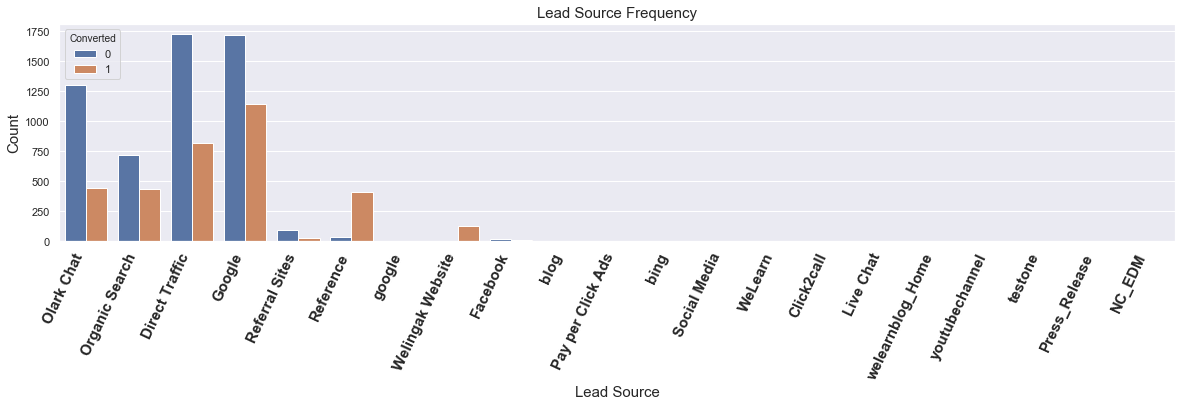

In [1568]:
## 1. 
plt.figure(figsize=(20,4))  # Figure Size
# Column = Lead Source

sns.set(style="darkgrid")
ax=sns.countplot(x = 'Lead Source',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('Lead Source Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Lead Source', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 65,ha = 'right',weight="bold",fontsize=15)

plt.show()

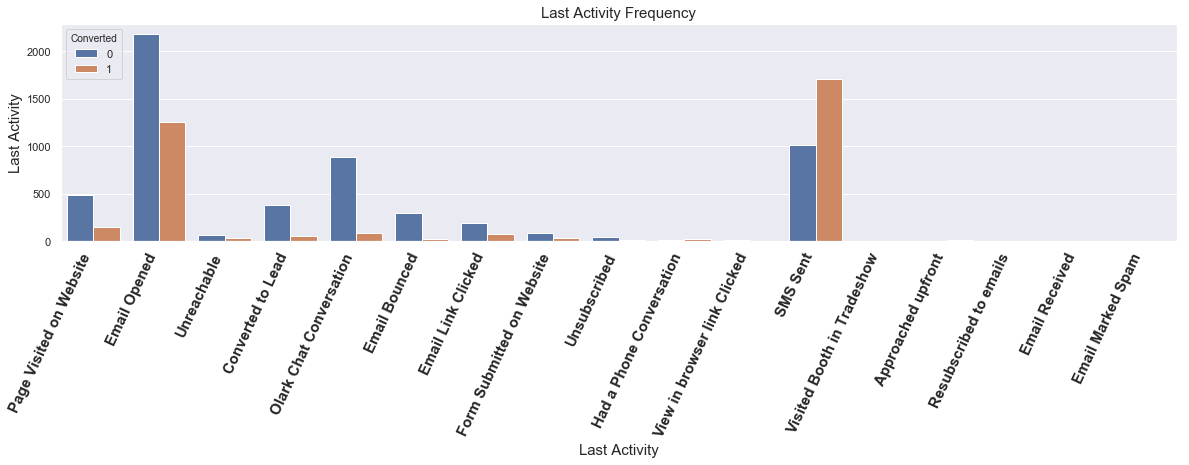

In [1569]:
# Column = Last Activity
plt.figure(figsize=(20,4))  # Figure Size

sns.set(style="darkgrid")
ax=sns.countplot(x = 'Last Activity',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('Last Activity Frequency', fontsize=15)
plt.ylabel('Last Activity', fontsize=15)
plt.xlabel('Last Activity', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 65,ha = 'right',weight="bold",fontsize=15)
plt.show()

__Remarks:__ 
1. In `Lead Source`, conversions are more from `direct traffic, google and organic search` which is ideally good. THis suggests that, more people are searching for the similar courses as well as google is ranking the site in top 5 or 10.
2. In `Last activity`, `SMS Sent` and `Email Opened`  have better conversion rates. This clearly indicates that, rather than mass marketing, one to one marketing is working for lead conversions.

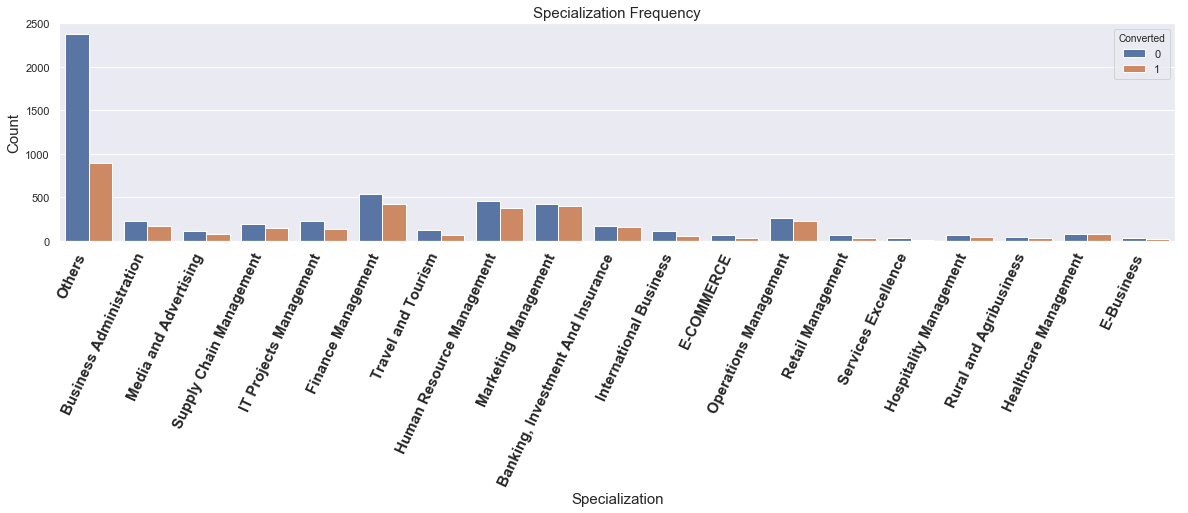

In [1570]:
# Column = Specialization
plt.figure(figsize=(20,4))  # Figure Size

sns.set(style="darkgrid")
ax=sns.countplot(x = 'Specialization',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('Specialization Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Specialization', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 65,ha = 'right',weight="bold",fontsize=15)
plt.show()

__Remarks:__ 
1. If we remember, `Others category replaced NaN` in data pre-processing. It is good that we did not delete data because, `Conversion rate` is high even when the `Specializations` are not mentioned by the people.
2. Company should research on whether avalible select list is enough or they need to add more areas in specialization column.

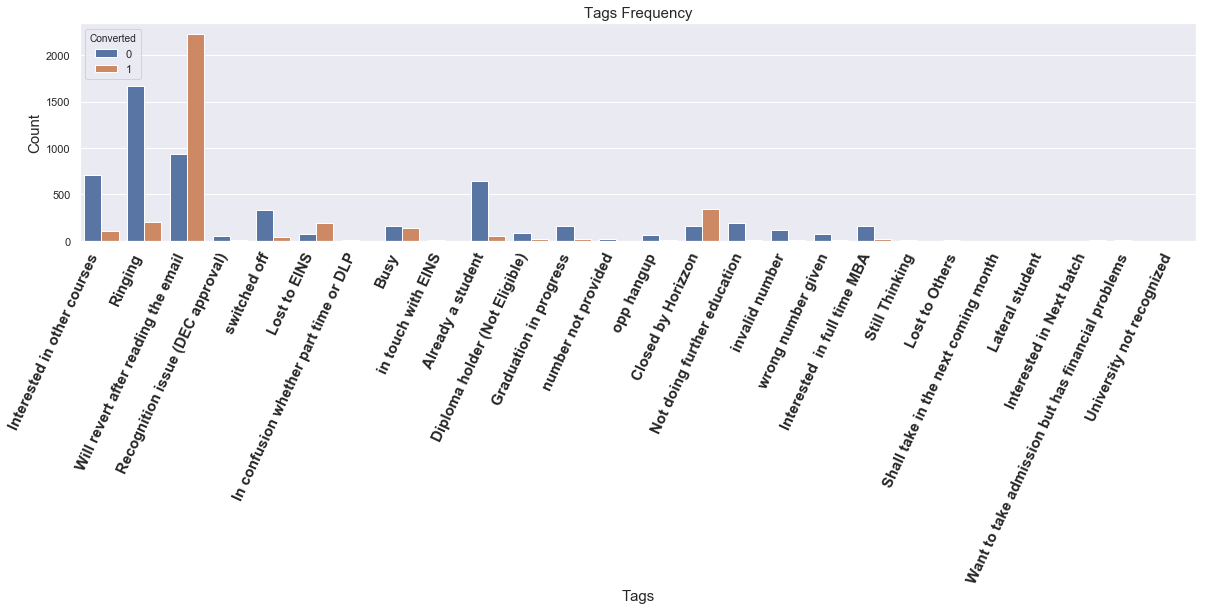

In [1571]:
# Column = Tags
plt.figure(figsize=(20,4))  # Figure Size

sns.set(style="darkgrid")
ax=sns.countplot(x = 'Tags',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('Tags Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Tags', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 65,ha = 'right',weight="bold",fontsize=15)
plt.show()

__Remarks:__ After first hand telephonic conversation, people who said, they will revert to the mail feel like the more serious people and they converted well.

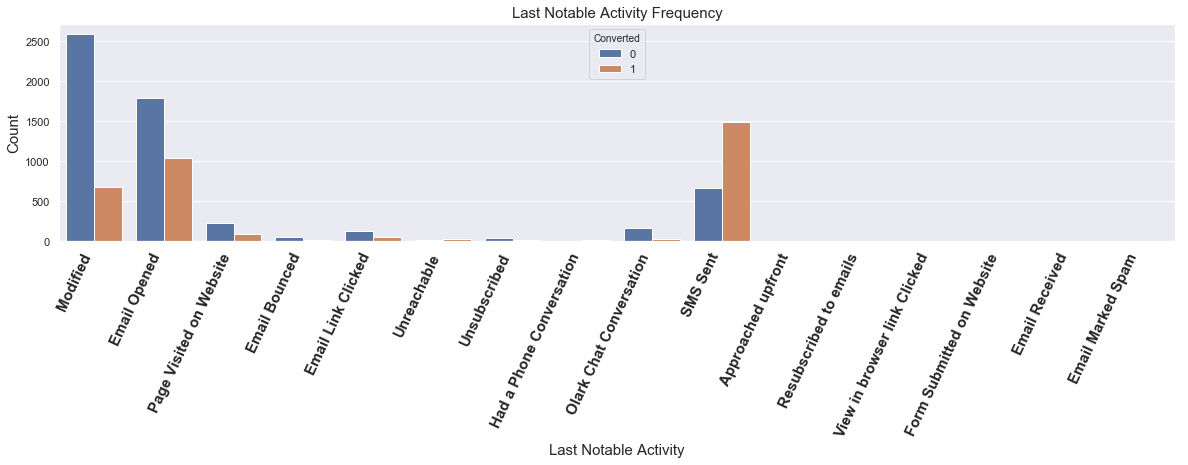

In [1572]:
# Column = Last Notable Activity
plt.figure(figsize=(20,4))  # Figure Size

sns.set(style="darkgrid")
ax=sns.countplot(x = 'Last Notable Activity',hue ='Converted',data = df_leads, 
                 hue_order = [0,1])
plt.title('Last Notable Activity Frequency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Last Notable Activity', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 65,ha = 'right',weight="bold",fontsize=15)

plt.show()

__Remarks:__ 
1. `Last Notable Activity` suggests that people convrted when they had personalized communication like `Email and SMS`.

__Concluding remarks on Univariate Analysis:__ We can see that, people who reached till personalized communications like `SMS` and with back grounds other than the company marked typically search the google for this kind of courses.
These are the kind that are getting converted.

#### 4.4: Bivariate Analysis: 
We can perform extensive bi-variate analysis for this case study. But since scope of the study is modelling. We will restrict our study to
1. `Scatter Plots`
2. `Correlation HeatMaps`

to understand the one-on-one relationships among features.

##### Scatter Plot:

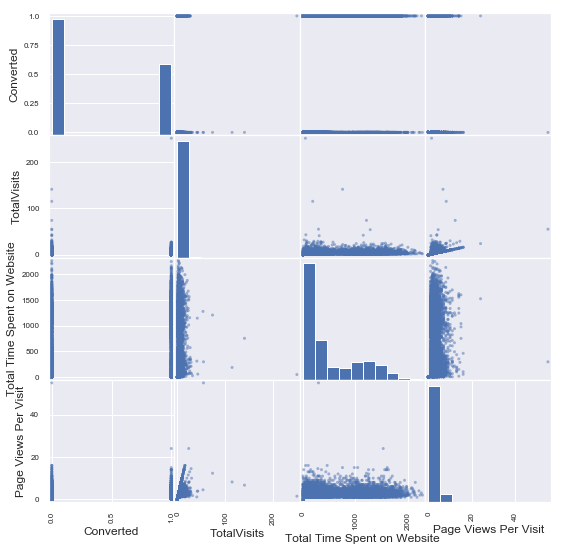

In [1573]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_leads,figsize = (9,9))
plt.show() 

__Remarks:__
1. It clearly suggests that, the data is largely categorical and the only relationship seems viable is:
    - A slightly linear relationship between `Total Visits` and `Page Views per visit`.
    - This is expected because, the outcomes of `Total Visits` and `Page Views per visit` are dependent on each other.
    - Relation: `Only when you visit, you view pages.` It makes sense to have a relationship.

##### Correlation Heatmap: Understanding `Multi-Collinearity` among features


Understanding `Multi-Collinearity` among features
Multicollinearity is the dependence of `one predictor variables(features) on other predictors` with high degree of accuracy. In other words, we can exlain one input variable as a combination one or more other input variables.
- *__`Example:`__* If $x_1 = 2x_2 + 3x_3$, then using 3 input variables or any combination of 2 variables will result in same  parameter estimates.
- Multi-collinarity effects the `interpretability` and finds `multiple solutions`.

We will try to draw either `heat map` or `Compute correlation matrix` to understand the same. Since we have large number of variables, we will do the following.
1. Divide the columns into original/quantitative/binary and dummies.
2. Construct heat map for original/quantitative/binary vaues
3. `Categorical variables` and will not have any relationship with each other. So we do not compute correlation of any sort.

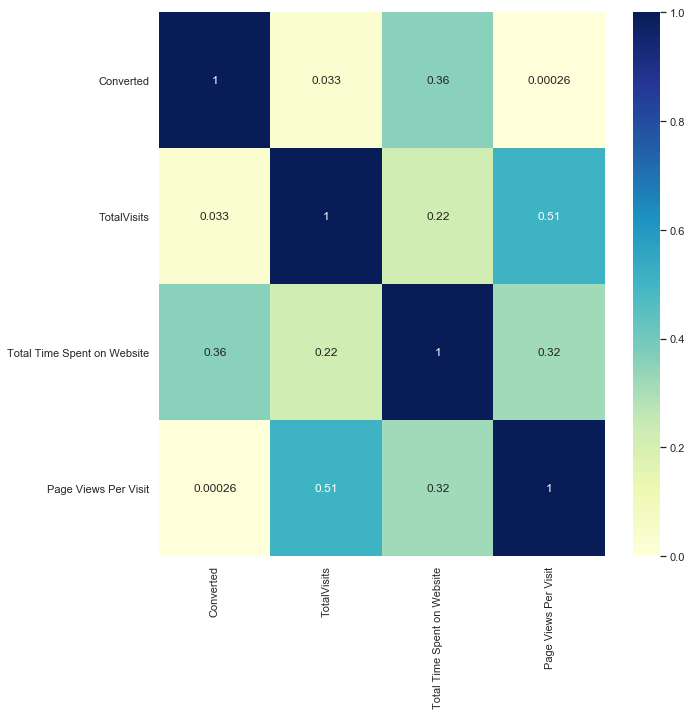

In [1574]:
df_train_original = df_leads
plt.figure(figsize = (10, 10))
sns.heatmap(df_train_original.corr(), annot = True, cmap="YlGnBu")
plt.show()

__Remarks:__

__We can see that, `Page views per visit` and `Total Visits` are highly correlated as observed in scatter plot.__ <br>
__We can also see that `Total Time Spent on website` is correlated to `Converted` (Conversion) which is understandable__

### 5: Data Preperation

#### 5.1: `Encoding/Creating dummy values` for categorical Data
- Encoding or Converting strings to numerical equals is important because `logistic regression algorithm` is a __numerical optimization method__ and a cannot understand non-numeric data. 

For `Categorical variables`, we perform the following encoding procedure.
1. __Categories with only `2 Types:`__ We will make 0 or 1
2. __Categories with `multiple types (>2)`:__ We will use syntax:`get_dummies` and make it `n-1 columns` by deleting all `0` variable.

*__`Note:`__There are algorithms like `decision trees` where we do not have to encode data but it is out of  scope for present work.*

##### Encoding features with `2 categorical variables`

Features with only 2 values are as mentioned in the b elow cell. All these features have `Yes and No Categories`.
All these `features will be converted to 0 or 1`.

In [1575]:
# Convert 2 category variables to binary numeric
# Create a list for suitable variables
varlist = ['Do Not Email',
           'Do Not Call',
           'Search',
           'Newspaper Article',
           'X Education Forums',
           'Newspaper',
           'Digital Advertisement',
           'Through Recommendations',
           'A free copy of Mastering The Interview']

# Define the map function
def binary_map(x):
    return x.map({'Yes':1, 'No':0})

# Apply map function
df_leads[varlist] = df_leads[varlist].apply(binary_map)

In [1576]:
# Check for the datatype to know whether the conversion is smooth or not
df_leads.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                                int64
Do Not Call                                 int64
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
Search                                      int64
Newspaper Article                           int64
X Education Forums                          int64
Newspaper                                   int64
Digital Advertisement                       int64
Through Recommendations                     int64
Tags                                       object
A free copy of Mastering The Interview      int64
Last Notable Activity                      object


#####  Categorical Variables with `> 2 Values`
Categorical features with greater than 2 values are:
1. `Lead Origin`: 4
2. `What is your current occupation`: 6
3. `Lead Source`: 21
4. `Last Activity`: 17
5. `Specialization`: 19
6. `Last Notable Activity`: 16

We are using `get_dummies` function to make `different columns from each type of each category`. We delete one dummy from each dummies set per feature becase if all others are not, it is obvious that the category is the last one.

In [1577]:
# Create dummy variables for the remaining object columns from the above list
dummy_var = pd.get_dummies(df_leads[['Lead Origin',
                                     'Lead Source',
                                     'Last Activity',
                                     'Specialization',
                                     'What is your current occupation',
                                     'Tags',
                                     'Last Notable Activity']],drop_first=True)

# Add dummy variables to the main data drame df_leads
df_leads = pd.concat([df_leads, dummy_var], axis=1)

##### Deleting original Categorical Variables and inspecting datatypes of data again:
Now, let us make it regression ready by deleting initial __`categorical variables`__

In [1578]:
# Drop the noin-dummy counter parts
df_leads = df_leads.drop(['Lead Origin',
                          'Lead Source',
                          'Last Activity',
                          'Specialization',
                          'What is your current occupation',
                          'Tags',
                          'Last Notable Activity'], axis=1)

In [1579]:
# Inspect the data again
print(df_leads.shape)
# Data types
df_leads.dtypes.values

(9074, 115)


array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'),
       dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('uint8'), dtype('uint8'), dtype('uint8'),
       dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'),
       dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'),
       dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'),
       dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'),
       dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'),
       dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'),
       dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'),
       dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'),
       dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'),
       dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'),
  

__Remarks:__
Datatypes of all columns are now either integer or float(numeric data type). The data is good to go into modelling.

#### 5.2: `Re-Scaling` Data:
##### `Train-Test`  Split  
It is advised to re-scale data `after the train-test split`. <br> 
__`Reason:`__ While re-scaling data, we will use values like `minimun/maximum/variance/mean`. If we use these values before test-train split. We are including the influence of test data also in scaling which evidently makes test data a seen data.
- `Example:` Suppose say there is a variable $x_1$,
    - Train data range: With `mean 0.4` and `sigma 0.008` 
    - Test data range:  With `mean 0.5` and `sigma 0.01`
    -  Before split, range:  `mean 0.43` and `sigma 0.095`
<br> <br>
- Now  if we do `standard scaling (standardization)` before __train test split__. 

    - Formula: __$x_1^{scaled} = \frac{x_1^{value} - \mu}{\sigma}$__
    
    - Train data will be split `using mean of 0.43` while these values do not exist in train data after splitting.
    - Also, we are scaling according to the test data
<br> <br>
- This is not advisable. So `train-test split` is always performed before scaling to avoid these effects.
- Re-Scaling is performed __`only on quantitative variables`__. 

I am taking `train-test split in 0.7:0.3 ratio` since data is less in number.

In [1580]:
# Import train test split library from sklearn
from sklearn.model_selection import train_test_split

# Assign x and y variables
X = df_leads.drop('Converted', axis=1)
y = df_leads['Converted']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1581]:
# Scale the features so that observations are comparable across variables
# import required libraries
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the variables
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

__Note:__ Note that we are not doing any scaling for dummies because, anyway there are all 0 or 1.

In [1582]:
# Check Shape
X_train.shape

(6351, 114)

### 6. `Model building and Tuning`
While building model, it is preferable to have a model that can be interpreted clearly. A few things to keep in mind.
1. Better to have a easier model (less parameters) with relatively lesser accuracy (Ex: 0.9) than a complicated model (more parameters) which is just a bit more accurate (Ex: 0.9002).
2. Understanding the `multi-collinearity` among features is extremely important to have `better interpretability`.

In our study, we broadly follow the following iterative process to recommend the best solution.
1. Have a look at the correlations
2. Estimating an `all column model parameters`
3. Performing `Recursive feature elimination`
4. Re-estimating `model parameters`
5. Interpreting at the following 2 things
    - __`model summary:`__ Studying P-Values, F-Statistic
    - __`VIF Computation:`__ Making every feature an output and fitting model with rest of the features. __`It studies whether the feature is a dependent or independent variable`__
<br> <br>
6. Performing  steps 3 to 5 iteratively untill you get a decent model.
7. Then using your subject knowledge, `add/eliminate` features manually 
8. Stop when we get an optimal accuracy, precision, recall and sensitivity.

*__`Note:`__* *We use `sklearn for RFE` and `statsmodel for parameter estimation`. Statsmodel provides the statistical interpretability better than sklearn. Otherwise, both compute the same algorithm.* 

In [1583]:
# Import stats model

import statsmodels.api as sm

#### 6.1:  Estimating an `all parameter model`
All parameter model gives us an idea on the $R^2$ upperbound. But it is very difficult to explain the model. So, we will perform VIF and RFE and make an interpretable model for performance trade off.

In [1584]:
# Create logistic regression model
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6239
Model Family:                Binomial   Df Model:                          111
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1784.9
Date:                Mon, 10 Jun 2019   Deviance:                       3569.9
Time:                        21:55:57   Pearson chi2:                 6.80e+03
No. Iterations:                    23   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     25.9624   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Do Not Email                                              -1.6569      0.276     -5.999      0.000      -2.198      -1.116
Do Not Call                                               22.9192   8.72e+04      0.000      1.000   -1.71e+05    1.71e+05
TotalVisits                                                0.1535      0.060      2.554      0.011       0.036       0.271
Total Time Spent on Website                                1.1139      0.051     21.809      0.000       1.014       1.214
Page Views Per Visit                                      -0.1539      0.065     -2.349      0.019      -0.282      -0.026
Search                                                     0.4439      1.631      0.272      0.786      -2.753       3.640
Newspaper Article                                         25.3863   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
X Education Forums                                       -48.5881   1.85e+05     -0.000      1.000   -3.63e+05    3.63e+05
Newspaper                                                -23.8985   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Digital Advertisement                                     -0.2802      1.712     -0.164      0.870      -3.635       3.075
Through Recommendations                                    1.3967      2.854      0.489      0.625      -4.197       6.991
A free copy of Mastering The Interview                    -0.2124      0.137     -1.548      0.122      -0.481       0.057
Lead Origin_Landing Page Submission                       -0.9763      0.174     -5.620      0.000      -1.317      -0.636
Lead Origin_Lead Add Form                                 -0.9343      2.081     -0.449      0.653      -5.013       3.144
Lead Origin_Lead Import                                   25.9406   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                                -2.7845      2.866     -0.971      0.331      -8.402       2.834
Lead Source_Facebook                                     -27.5173   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                        -2.5711      2.865     -0.897      0.369      -8.186       3.044
Lead Source_Live Chat                                     21.6695   9.26e+04      0.000      1.000   -1.82e+05    1.82e+05
Lead Source_NC_EDM                                        23.0832   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Olark Chat                                    -1.6901      2.858     -0.591      0.554      -7.291       3.911
Lead Source_Organic Search                                -2.5486      2.868     -0.889

##### Detailed Analysis
1. Having high `Standard Errors` means __if we train the same model with a `different realization of random sample, the parameter estimates are very different` from the current estimates.__ This happens due to the following reasons.
    1. Insufficient data (large number of features need large data set)
    2. High multi collinearity are few of the reasons. 
<br> <br>
2. Having `high std errors` also demonstrates the model is not robust. Though the metrics like $R^2$ and Adjusted $R^2$ are really high. This `model is unreliable`.
3. `Multi Collinearity` is also evident from high P-values.


__`Conclusion:`__ 
1. It is better to perform `feature elimination using RFE and find a more robust but less accurate model`.
2. Try and `remove as much multicollinearity as possible so that the model is interpretable`.

#### 6.2 Feature Selection Using RFE

##### `Recursive Feature Elimination` (RFE):
RFE is an automated process of eliminating features from dataframes using statistical principles. Let us take this forward in the following way. We will `aim at collecting the best 12-15 features from the entire data set`. This process should be done iteratively in steps.
1. Find the top 15 features using RFE
2. Compute the LR estimates from statsmodel
3. Compute VIF
4. Check which columns to be dropped.
5. Drop them
6. Repeat 2-4 Steps

#### VIF > 5 are dropped one after other

In [1585]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1586]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)
rfe = rfe.fit(X_train, y_train)

In [1587]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False])

In [1588]:
a =list(zip(X_train.columns, rfe.support_, rfe.ranking_))
a[1:4] 

[('Do Not Call', False, 49),
 ('TotalVisits', False, 74),
 ('Total Time Spent on Website', False, 7)]

In [1589]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [1590]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=102)

##### Assess the model with Stats Model

In [1591]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2212.2
Date:                Mon, 10 Jun 2019   Deviance:                       4424.5
Time:                        21:56:00   Pearson chi2:                 7.20e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2025      0.133     -9.065      0.000      -1.463      -0.943
Do Not Email                                            -1.7711      0.190     -9.340      0.000      -2.143      -1.399
Lead Origin_Landing Page Submission                     -1.5928      0.132    -12.108      0.000      -1.851      -1.335
Lead Source_Welingak Website                             5.5271      0.746      7.410      0.000       4.065       6.989
Last Activity_Olark Chat Conversation                   -1.7120      0.167    -10.254      0.000      -2.039      -1.385
Last Activity_Unsubscribed                               1.9720      0.519      3.803      0.000       0.956       2.988
Specialization_Others                                   -1.6660      0.137    -12.174      0.000      -1.934      -1.398
What is your current occupation_Working Professional     1.9450      0.218      8.917      0.000       1.517       2.372
Tags_Busy                                                1.6471      0.184      8.966      0.000       1.287       2.007
Tags_Closed by Horizzon                                  3.4201      0.154     22.218      0.000       3.118       3.722
Tags_Lost to EINS                                        3.7538      0.196     19.138      0.000       3.369       4.138
Tags_Will revert after reading the email                 3.0578      0.090     33.791      0.000       2.880       3.235
Last Notable Activity_SMS Sent                           2.1538      0.096     22.454      0.000       1.966       2.342
========================================================================================================================
"""

In [1592]:
col1 = col

##### Check for VIF

In [1593]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1594]:
# Calculate the VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,1.68
5,Specialization_Others,1.60
1,Lead Origin_Landing Page Submission,1.54
11,Last Notable Activity_SMS Sent,1.44
3,Last Activity_Olark Chat Conversation,1.31
6,What is your current occupation_Working Profes...,1.22
0,Do Not Email,1.18
8,Tags_Closed by Horizzon,1.09
4,Last Activity_Unsubscribed,1.07
2,Lead Source_Welingak Website,1.06


__Remarks:__
While reducing features, we typically look for:
1. VIF (Variable Inflation Factor): Linear relationship among features. `VIF < 5 is desirable.` 
2. `P-Values < 0.05 is desirable.`

Since both the conditions are met. We will keep these 10 features as final. __We will not add or delete any more features.__ Let us proceed with Metric analysis and ROC curves.

In [1595]:
contribution_each_coeff = 100*res.params.sort_values(ascending = False)/sum(abs(res.params.values))
contribution_each_coeff

Lead Source_Welingak Website                            17.590568
Tags_Lost to EINS                                       11.946680
Tags_Closed by Horizzon                                 10.884651
Tags_Will revert after reading the email                 9.731648
Last Notable Activity_SMS Sent                           6.854722
Last Activity_Unsubscribed                               6.276092
What is your current occupation_Working Professional     6.190008
Tags_Busy                                                5.242104
const                                                   -3.827151
Lead Origin_Landing Page Submission                     -5.069084
Specialization_Others                                   -5.302076
Last Activity_Olark Chat Conversation                   -5.448512
Do Not Email                                            -5.636703
dtype: float64

__Note:__ RFE is choosing 1 or 2 new columns at the end of every iteration. Please do ignore a change in one variable. But it is not effewcting the final result or analysis in any way.

##### `Looking at the estimated probabilities and their associated true classifications `

In [1596]:
# Get the predicted values
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:14]

array([0.56524952, 0.22624851, 0.05373313, 0.34491571, 0.72281748,
       0.91806317, 0.05757942, 0.93075952, 0.56524952, 0.05757942,
       0.56524952, 0.01141606, 0.05757942, 0.91238495])

##### Map Probabilities with Classification 

In [1597]:
# Create a data frame with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index 

# Map predicted values with original classification
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x> 0.5 else 0)
y_train_pred_final.set_index('Lead Number', inplace = True)
y_train_pred_final.head(10)

,Converted,Converted_prob,Predicted
Lead Number,,,
630949,0,0.565250,1
649355,0,0.226249,0
579735,0,0.053733,0
614238,1,0.344916,0
588625,1,0.722817,1
646388,1,0.918063,1
632041,0,0.057579,0
612248,1,0.930760,1
591797,1,0.565250,1


__Remarks:__ You can see there are differences in `Predicted and Converted`, which says the dataframe is compiled correctly

##### Computing `Confusion Matrix` 

In [1598]:
# Check the confusion matrix
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

In [1599]:
confusion_matrix_df = pd.DataFrame(con_mat, index = ['Actual Negative','Actual Positive'], 
                                   columns = ['Predicted Negative','Predicted Positive'])
confusion_matrix_df

,Predicted Negative,Predicted Positive
Actual Negative,3320,585
Actual Positive,402,2044


In [1600]:
TP = con_mat[1,1] # true positive 
TN = con_mat[0,0] # true negatives
FP = con_mat[0,1] # false positives
FN = con_mat[1,0] # false negatives

##### Metrics Computation

In [1601]:
# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)

# Positive predictive value
round(100*TP/float(TP+FP))

# Measure false positive rate
FPrate = round(100*FP/float(TN+FP),1)

In [1602]:
Metrics = {'Accuracy': Accuracy, 
     'Sensitivity': Sensitivity,
     'Specificity': Specificity,
    'False Positive Rate': FPrate}

Metrics

{'Accuracy': 84.5,
 'Sensitivity': 84.0,
 'Specificity': 85.0,
 'False Positive Rate': 15.0}

##### Plot ROC: 
Roc Curve is a curve between probabilities of `True Positive Rate` and `False Positve rate`. 
We have to choose an ideal cutoff of probability where we turn a 0 to 1 according to the choice of metric. 

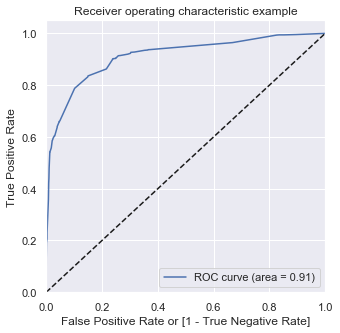

In [1603]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

__Remarks:__ At P =0.4, the predictive power of model is stabilizing. So we take P = 0.4

In [1604]:
# Create columns with different probability cutoffs
numbers = [float(x)/10 for x in range (10)]
for i in numbers: 
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Lead Number,,,,,,,,,,,,,
630949,0,0.565250,1,1,1,1,1,1,1,0,0,0,0
649355,0,0.226249,0,1,1,1,0,0,0,0,0,0,0
579735,0,0.053733,0,1,0,0,0,0,0,0,0,0,0
614238,1,0.344916,0,1,1,1,1,0,0,0,0,0,0
588625,1,0.722817,1,1,1,1,1,1,1,1,1,0,0


In [1605]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.758936     0.934587     0.648912
0.2   0.2  0.785703     0.921913     0.700384
0.3   0.3  0.813415     0.902698     0.757490
0.4   0.4  0.844591     0.835650     0.850192
0.5   0.5  0.844591     0.835650     0.850192
0.6   0.6  0.840025     0.661488     0.951857
0.7   0.7  0.829318     0.603025     0.971063
0.8   0.8  0.815777     0.542110     0.987196
0.9   0.9  0.791844     0.475879     0.989757


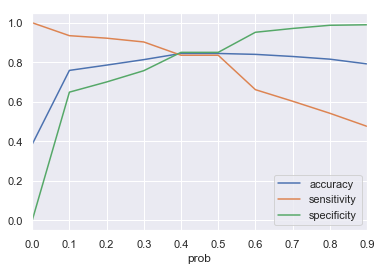

In [1606]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensitivity','specificity'])
plt.show()

__Conclusion:__ Both `ROC Curve` and `Sensitivity Vs Specificity and Accuracy` curves converge at `0.4`.

In [1607]:
y_train_pred_final['Final_Predict'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>0.4 else 0)


In [1608]:
# Measure Lead Score
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predict,Lead Score
Lead Number,,,,,,,,,,,,,,,
630949,0,0.565250,1,1,1,1,1,1,1,0,0,0,0,1,57
649355,0,0.226249,0,1,1,1,0,0,0,0,0,0,0,0,23
579735,0,0.053733,0,1,0,0,0,0,0,0,0,0,0,0,5
614238,1,0.344916,0,1,1,1,1,0,0,0,0,0,0,0,34
588625,1,0.722817,1,1,1,1,1,1,1,1,1,0,0,1,72


In [1609]:
# Final DataFrame
www = list(y_train_pred_final.columns)
y_train_pred_final.drop(www[2:-2],axis = 1, inplace = True)
y_train_pred_final.head()

,Converted,Converted_prob,Final_Predict,Lead Score
Lead Number,,,,
630949,0,0.565250,1,57
649355,0,0.226249,0,23
579735,0,0.053733,0,5
614238,1,0.344916,0,34
588625,1,0.722817,1,72


In [1610]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Final_Predict)

0.8445914029286726

In [1611]:
con_mat2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Final_Predict)
con_mat2
TP = con_mat2[1,1] # true positive 
TN = con_mat2[0,0] # true negatives
FP = con_mat2[0,1] # false positives
FN = con_mat2[1,0] # false negatives

In [1612]:
# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predict)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)

# Positive predictive value
round(100*TP/float(TP+FP))

# Negative Predictive Value
round(100*TN/float(TN+FN),1)

# Precision
Precision = round(100*TP/float(TP+FP))

# Recall
Recall = round(100*TP/float(TP+FN),1)

In [1613]:
Metrics_train = {'Accuracy': Accuracy, 
     'Sensitivity': Sensitivity,
     'Specificity': Specificity,
    'False Positive Rate': FPrate,
     'Precision': Precision,
     'Recall': Recall}

Metrics_train

{'Accuracy': 84.5,
 'Sensitivity': 84.0,
 'Specificity': 85.0,
 'False Positive Rate': 15.0,
 'Precision': 78.0,
 'Recall': 83.6}

Checking Precision and Recall score using sklearn

In [1614]:
from sklearn.metrics import precision_score, recall_score

In [1615]:
Precision_sklearn = round(100*precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predict),1)
Recall_sklearn = round(100*recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predict),1)

print('Precision_sklearn',Precision_sklearn)
print('Recall_sklearn',Recall_sklearn)

Precision_sklearn 77.7
Recall_sklearn 83.6


#### Verify with `Precision and Recall Tradeoff`

In [1616]:
# Import precision recall curve
from sklearn.metrics import precision_recall_curve

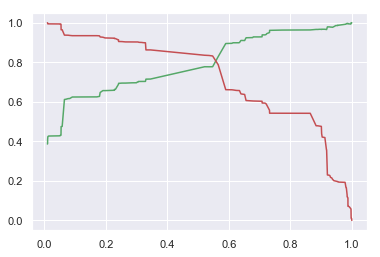

In [1617]:
p,r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

__Remarks:__ We can say from `Precision and Recall trade off` that they both stabilize at 0.4 probability and converge at 0.6.  This reassures our choice of P=0.4. We chose on the basis of `Recall`. Now let us see <font color = Red> why we chose `Recall` as our primary metric? </font>

Our aim in the work is `to predict as many convertable leads as possible`.
- This also means `Reducing false negative and increasing true positive number` which exactly `Recall` does.
- We can also see that `Recall` is higher which is desirable.

#### Making predictions using the test data set

In [1618]:
# Scale the variables
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [1619]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Lead Origin_Landing Page Submission,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,
628652,0,0,0,0,0,1,0,0,0,0,1,0
644500,0,1,0,0,0,0,1,0,0,0,1,0
588935,0,0,0,0,0,1,0,0,0,0,0,0
619437,0,0,0,0,0,0,0,0,1,0,0,0
623381,0,1,0,0,0,0,0,0,0,0,0,0


In [1620]:
X_test_sm = sm.add_constant(X_test)

In [1621]:
y_test_pred = res.predict(X_test_sm)

In [1622]:
y_test_pred[:14]

Lead Number
628652    0.547181
644500    0.900917
588935    0.053733
619437    0.901813
623381    0.057579
641959    0.900917
599959    0.344916
613711    0.057579
619391    0.912385
614597    0.053733
621976    0.912385
619500    0.010146
637281    0.053733
624317    0.010146
dtype: float64

In [1623]:
# Convert y_pred to a data frame which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1624]:
y_pred_1.head()

,0
Lead Number,
628652,0.547181
644500,0.900917
588935,0.053733
619437,0.901813
623381,0.057579


In [1625]:
# Convert y_test to a Dataframe
y_test_df = pd.DataFrame(y_test)

In [1626]:
# Mapp to the index
y_test_df['Lead Number'] = y_test_df.index

In [1627]:
# Remove the index of both the dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1628]:
# Append y_pred_1 and y_test_df
y_pred_final = pd.concat([y_test_df,y_pred_1], axis=1)
y_pred_final.set_index('Lead Number', inplace = True)

In [1629]:
# Rename the column
y_pred_final = y_pred_final.rename(columns={0 :'Converted_prob'})

In [1630]:
# Rearrange columns
y_pred_final = y_pred_final.reindex_axis([ 'Converted','Converted_prob'], axis=1)

In [1631]:
y_pred_final.head()

,Converted,Converted_prob
Lead Number,,
628652,0,0.547181
644500,1,0.900917
588935,0,0.053733
619437,1,0.901813
623381,0,0.057579


In [1632]:
y_pred_final['Final_pred'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0 )
y_pred_final.head()

,Converted,Converted_prob,Final_pred
Lead Number,,,
628652,0,0.547181,1
644500,1,0.900917,1
588935,0,0.053733,0
619437,1,0.901813,1
623381,0,0.057579,0


Check the accuracy of the predicted model

In [1633]:
# Create confusion matrix
con_mat3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_pred)
con_mat3

array([[1464,  270],
       [ 181,  808]])

In [1634]:
TP = con_mat3[1,1] # true positive 
TN = con_mat3[0,0] # true negatives
FP = con_mat3[0,1] # false positives
FN = con_mat3[1,0] # false negatives

# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predict)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)

# Positive predictive value
round(100*TP/float(TP+FP))

# Negative Predictive Value
round(100*TN/float(TN+FN),1)

# Precision
Precision = round(100*TP/float(TP+FP))

# Recall
Recall = round(100*TP/float(TP+FN),1)

#### Metrics for train and Test Sets

In [1635]:
Metrics_test = {'Accuracy': Accuracy, 
     'Sensitivity': Sensitivity,
     'Specificity': Specificity,
    'False Positive Rate': FPrate,
     'Precision': Precision,
     'Recall': Recall}

In [1636]:
Metrics_train

{'Accuracy': 84.5,
 'Sensitivity': 84.0,
 'Specificity': 85.0,
 'False Positive Rate': 15.0,
 'Precision': 78.0,
 'Recall': 83.6}

In [1637]:
Metrics_test

{'Accuracy': 84.5,
 'Sensitivity': 82.0,
 'Specificity': 84.4,
 'False Positive Rate': 15.0,
 'Precision': 75.0,
 'Recall': 81.7}

__Remarks:__
1. All the metrics suggest that the model is a decent representation of the data.
2. The accuracy is as high as `83% approx` which resembles quite a good model
3. `Precision` and `Recall` are also good.


Our aim in the work is `to predict as many convertable leads as possible`.
- This also means `Reducing false negative and increasing true positive number` which exactly `Recall` does.
- We can also see that `Recall` is higher which is desirable.

### 7. Concluding Remarks:

In [1638]:
X_test.columns

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

__Remarks:__ From the chosen features, It is evident that
1. Having a one to one conversation like `Chat` or `Phone call` seems like affecting alot in conversions. 
2. Ading to that, `Working Professionals` are more active leads
3. We previously emphasised that `time spent on website might have an impact` and the model is also considering it a. key feature.


If we refer to the `Univariate Analysis` that we performed, it is inline with the model deducted.
Thus, by combining both `analysis and model`, we can say, the model is a good representation of the data.